# Linear Regression: Your AI "Hello world!"

While it might seem simple, linear regression is a powerful tool for understanding relationships between variables and making predictions, which are core ideas in AI and ML. We'll explore how this model can be applied to real-world data.

## What is Linear Regression?

At its heart, linear regression is about finding the best-fitting straight line through a set of data points. This line helps us understand how one variable (the outcome/dependent variable) changes in response to another variable (the explanatory/independent variable). This is incredibly useful for identifying trends, making predictions, and even inferring causal relationships (with careful interpretation!).

## The Problem: Indoor CO2 Levels and Occupancy

This notebook uses a dataset that was collected by students at J. Sterling Morton High School as part of a study on CO2 levels in classrooms. We will investigate if there's a linear relationship between the **number of people in a room** and the **CO2 level** in that room.

### Setting Up Our Environment

First, we need to import the necessary Python libraries. We'll use `pandas` for data manipulation and `matplotlib.pyplot` for visualization. We will also be using a couple of new libraries: `seaborn` for plotting, and "scikit-learn" (`sklearn`) for our linear regression model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/Users/argonneed/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading and Exploring the Data

We will load the `co2_levels_and_people.csv` file that was pre-processed from multiple individual room datasets. This file contains the `CO2 Level (ppm)` and `Number of People in Room` for many observations. 

In [ ]:
# Load the dataset
classroom_data = pd.read_csv("https://raw.githubusercontent.com/ArgonneEducation/ai_for_science_teacher_institute/refs/heads/main/data/co2_levels_and_people.csv")
classroom_data.head()

,Number of People in Room,CO2 Level (ppm)
0,18,831
1,18,829
2,22,887
3,0,494
4,1,465


In [6]:
# Get a summary of the dataframe's information
classroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Number of People in Room  117 non-null    int64
 1   CO2 Level (ppm)           117 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [7]:
# Get descriptive statistics for numerical columns
classroom_data.describe()

,Number of People in Room,CO2 Level (ppm)
count,117.000000,117.000000
mean,11.820513,638.393162
std,9.450064,167.760192
min,0.000000,413.000000
25%,1.000000,494.000000
50%,15.000000,600.000000
75%,19.000000,756.000000
max,28.000000,1155.000000


## Why use Seaborn for Plotting?

You've already gained experience with `matplotlib.pyplot` for creating plots, which is a powerful and foundational Python plotting library. Now, we're introducing `seaborn`, which is another excellent library for data visualization. You might wonder, why use two different libraries for plotting?

Here's why `seaborn` is particularly useful, especially for exploring relationships in data and creating clear scientific visualizations.

1.  **Less Code**: Seaborn provides a higher-level interface than Matplotlib. This means you can often create complex and statistically-rich plots with fewer lines of code. 

2.  **Integrated with Pandas DataFrames**: Seaborn is designed to work seamlessly with pandas DataFrames.

3.  **Complementary to Matplotlib**: Seaborn is built on top of Matplotlib. This means your knowledge of Matplotlib is still very valuable! You can use Seaborn for the high-level plotting and then use Matplotlib functions (`plt.title()`, `plt.xlabel()`, `plt.legend()`, `plt.show()`, etc.) to further customize and refine your plots. They work together hand-in-hand.

4.  **Aesthetics and Professional Appearance**: Seaborn comes with built-in themes and color palettes that produce aesthetically pleasing and professional-looking plots by default.

## Making a Scatter Plot with Seaborn

Seaborn uses the `scatterplot()` function. Since Seaborn works with Pandas, we can reference the `x` and `y` data by simply calling the appropriate column names and use the `data` argument to reference the dataframe.

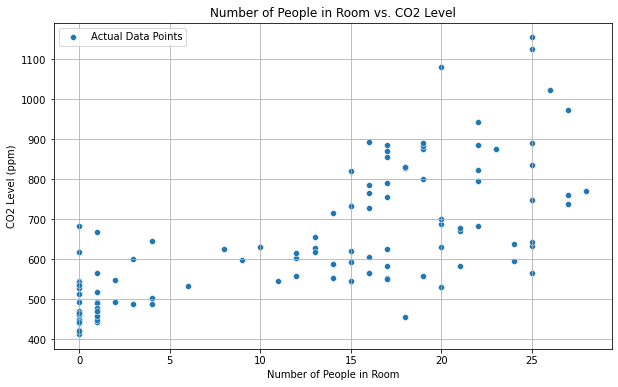

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of People in Room', y='CO2 Level (ppm)', data=classroom_data, label='Actual Data Points')

# Use Matplotlib to finish out the plot
plt.title('Number of People in Room vs. CO2 Level')
plt.xlabel('Number of People in Room')
plt.ylabel('CO2 Level (ppm)')
plt.grid(True)
plt.legend()
plt.show()

## Preparing Data for Linear Regression

For linear regression, we need to define our independent variable (X) and dependent variable (y). In our case, the 'Number of People in Room' will be our independent variable (X), and 'CO2 Level (ppm)' will be our dependent variable (y).

For linear regression, `X` should be a 2D array (or a DataFrame with a single column), and `y` should be a 1D array (or a Series).

### Understanding Data Dimensions for Linear Regression (X and y)

When preparing your data for linear regression, especially when using libraries like scikit-learn in Python, it's crucial to correctly shape your independent variable (often denoted as `X`) and your dependent variable (often denoted as `y`).

* **`X` (Explanatory/Independent Variable(s)):**
    * `X` represents the features or explanatory variables that you are using to make predictions.
    * **It should always be a 2D array or a pandas DataFrame.**
    * Even if you only have **one independent variable** (as in simple linear regression, like 'Number of People in Room' in our example), scikit-learn expects `X` to be 2-dimensional. This is because the model is designed to handle multiple features (columns) for more complex scenarios (multiple linear regression). When you have a single feature, you often see it created as `df[['your_column_name']]` to ensure it remains a DataFrame (2D).
    * Each row in `X` corresponds to a single data point or observation, and each column corresponds to a different feature.

* **`y` (Outcome/Dependent Variable):**
    * `y` represents the **target variable** or the outcome that you are trying to predict.
    * **It should always be a 1D array or a pandas Series.**
    * This is because for each observation (row) in your dataset, there is typically only one target value you are trying to predict.
    * You typically select `y` as a single column from your DataFrame, like `df['your_target_column_name']`, which results in a pandas Series (1D).

**Why this distinction?**

This convention helps the machine learning libraries clearly distinguish between the input features (which can be many) and the single output target for each observation. It provides a consistent interface for models, whether you're performing simple linear regression with one predictor or multiple linear regression with many predictors.


In [8]:
# Define independent (X) and dependent (y) variables
X = classroom_data[['Number of People in Room']]  # Explanatory/Independent variable (must be 2D)
y = classroom_data['CO2 Level (ppm)']             # Outcome/Dependent variable (1D)

## Building and Training the Linear Regression Model

Now we can create an instance of the `LinearRegression` model from `scikit-learn` and train it using our entire dataset. Training involves the model learning the coefficients (slope) and intercept of the best-fit line.

In [10]:
# Create a Linear Regression model object
model = LinearRegression()

# Train the model using the entire dataset
model.fit(X, y)

print("Model training complete!")

Model training complete!


## Getting the Equation of the Regression Line

The equation of a straight line is typically written as $y = mx + b$, where:
* $y$ is the dependent variable (CO2 Level in ppm).
* $x$ is the independent variable (Number of People in Room).
* $m$ is the slope of the line (the coefficient).
* $b$ is the y-intercept.

The equation of our regression line provides a direct way to understand the relationship:

**CO2 Level (ppm) = [Slope] * Number of People + [Intercept]**

* **Slope**: This value indicates how many parts per million (ppm) the CO2 level is estimated to increase for each additional person in the room. A positive slope supports the hypothesis that more people lead to higher CO2 levels.
  
* **Intercept**: This is the predicted CO2 level when there are zero people in the room. In a real-world scenario, this should ideally be close to the outdoor atmospheric CO2 concentration (currently around 420-450 ppm), assuming good ventilation when the room is empty.

Our linear regression model calculates these values for us. We can directly access them from the trained model.

In [11]:
# Get the model's coefficients (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Model Coefficient (Slope, m): {slope:.2f}")
print(f"Model Intercept (b): {intercept:.2f}")

print(f"\nThe equation of the regression line is: CO2 Level (ppm) = {slope:.2f} * Number of People + {intercept:.2f}")

Model Coefficient (Slope, m): 13.02
Model Intercept (b): 484.46

The equation of the regression line is: CO2 Level (ppm) = 13.02 * Number of People + 484.46


## Visualizing the Regression Line

Finally, let's visualize our trained linear regression line overlaid on the scatter plot of the original data using `seaborn`. This gives us a clear visual representation of the relationship the model has found.

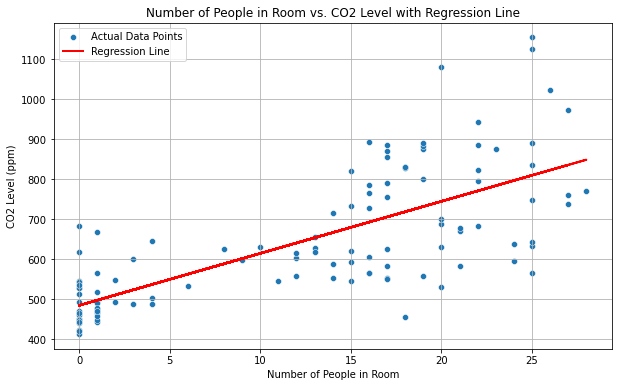

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of People in Room', y='CO2 Level (ppm)', data=classroom_data, label='Actual Data Points')

# Generate predictions for the entire dataset to plot the regression line
y_pred = model.predict(X)

# Flatten X to a 1D array for plotting
plt.plot(X.values.flatten(), y_pred, color='red', linewidth=2, label='Regression Line')

# Add title, axes, legend and grid lines
plt.title('Number of People in Room vs. CO2 Level with Regression Line')
plt.xlabel('Number of People in Room')
plt.ylabel('CO2 Level (ppm)')
plt.grid(True)
plt.legend()
plt.show()

## Evaluating the Model (Fit to Data)

Even though we're not doing a train-test split for generalization, we can still evaluate how well the line fits the data it was trained on. This helps us understand how much of the variation in CO2 levels is explained by the number of people in the room.

* **Mean Squared Error (MSE)**: Measures the average squared difference between the actual and predicted values. Lower MSE means a closer fit to the data.
* **R-squared ($R^2$) Score**: Represents the proportion of the variance in CO2 levels that is predictable from the number of people in the room. An $R^2$ of 1 indicates a perfect fit, while 0 indicates no linear relationship.

In [19]:
# Evaluate the model
r2 = r2_score(y, y_pred)

print(f"R-squared (R^2) Score on full data: {r2:.2f}")

R-squared (R^2) Score on full data: 0.54


## Interpreting the Results

The **R-squared ($R^2$) Score** tells us what percentage of the variation in CO2 levels is explained by the number of people in the room. For example, an R-squared of 0.75 would mean 75% of the CO2 variation can be accounted for by the number of people.

## Discussion and Further Exploration

This simplified linear regression model clearly shows the relationship between room occupancy and CO2 levels. However, it's crucial to remember:

* **Correlation vs. Causation**: In this specific case, the biological process of human respiration directly links people to CO2 production, suggesting a causal relationship. However, students should always be mindful that correlation alone doesn't prove causation in other scientific contexts.
* **Model Limitations**: A simple linear model might not capture all the complexities. Factors like room volume, ventilation rates, and the duration people have been in the room can also significantly affect CO2 levels. This simple model provides a baseline understanding.
* **Next Steps**: For a deeper dive, students could:
    * Consider adding other variables (if available from their original data collection, e.g., room temperature, whether windows/doors are open/closed, activity level) and perform **multiple linear regression** to see if a combination of factors provides an even better fit and explains more variation.
    * Investigate the concept of **residuals** (the differences between actual CO2 levels and the levels predicted by the line) to identify data points that don't fit the trend well and discuss why.